In [1]:
from prolint2 import Universe

/Users/danielramirez/mambaforge/envs/prolint2/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from prolint2.sampledata import GIRKDataSample
GIRK = GIRKDataSample()
u = Universe(GIRK.coordinates, GIRK.trajectory)

In [3]:
contacts = u.compute_contacts(cutoff=7)

  0%|          | 0/13 [00:00<?, ?it/s]

100%|██████████| 13/13 [00:00<00:00, 204.16it/s]


In [4]:
u.query.residues.resids

array([   1,    2,    3, ..., 1282, 1283, 1284])

In [5]:
from prolint2.metrics.metrics import Metric, MeanMetric, SumMetric, MaxMetric

mean_instance = MeanMetric()
metric_instance = Metric(contacts, mean_instance)
mean_contacts = metric_instance.compute()
mean_contacts

defaultdict(<function prolint2.metrics.formatters.DefaultOutputFormat.clear.<locals>.<lambda>()>,
            {1: defaultdict(dict,
                         {'POPE': {'MeanMetric': 0.08333333333333333},
                          'POPS': {'MeanMetric': 0.08333333333333333}}),
             10: defaultdict(dict,
                         {'POPS': {'MeanMetric': 0.08333333333333333}}),
             11: defaultdict(dict,
                         {'POPS': {'MeanMetric': 0.08333333333333333}}),
             12: defaultdict(dict,
                         {'POPS': {'MeanMetric': 0.08333333333333333}}),
             14: defaultdict(dict,
                         {'POPE': {'MeanMetric': 0.08333333333333333},
                          'POPS': {'MeanMetric': 0.08333333333333333}}),
             15: defaultdict(dict,
                         {'POPS': {'MeanMetric': 0.08333333333333333}}),
             16: defaultdict(dict,
                         {'POPE': {'MeanMetric': 0.08333333333333333},
       

In [6]:
u.database.unique_resnames

array(['CHOL', 'POPE', 'POPS'], dtype=object)

In [7]:
from prolint2.plot.plot_1d import get_metric_list_by_residues, plot_residue_data

tt = get_metric_list_by_residues(u, mean_contacts, lipid='CHOL', metric_name='MeanMetric')

In [8]:
tt

array([0., 0., 0., ..., 0., 0., 0.])

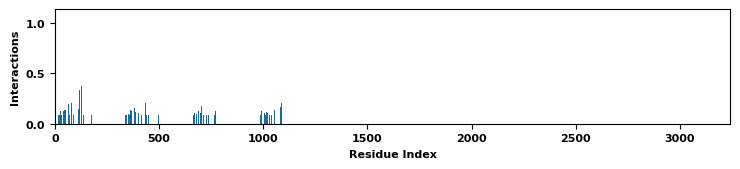

In [9]:
plot_residue_data(u, tt)